- Sequential - Framework for NN
- Dense - Fully connected layer with weights in each neuron
- Input - Input layer
- Flatten - Convert n-D data to 1-D
- Activation - Activation layers. They just apply a function to the input.
- Mnist - Dataset with handwritten digits.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Activation, Reshape
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(32),
    Activation('relu'),
    Dense(28*28),
    Reshape((28, 28))
])

In [13]:
model.compile(
    loss="mse",
    optimizer="adam",
)

In [22]:
model.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - val_loss: 0.0180
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - val_loss: 0.0180
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0185 - val_loss: 0.0181
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0179
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - val_loss: 0.0180
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [23]:
reconstructed_images = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


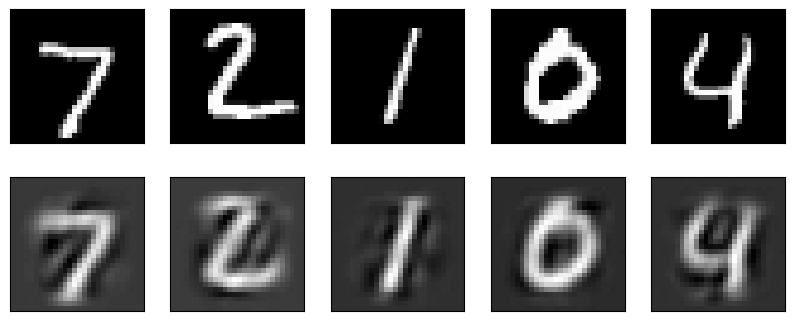

In [24]:
n = 5 # Number of images to display
plt.figure(figsize=(10, 4))

for i in range(n):
  # Display original images
  ax = plt.subplot(2, n, i + 1) # 2 rows, n columns, i + 1th position
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstructed images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(reconstructed_images[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()